# MYSQL Veritabanındaki Verilerin CSV'ye Aktarılması ve HeatMap Oluşturulması

#### Author: Uğur ILGIN

### Gerekli Mysql Kütüphanelerinin Yüklenmesi ve Projeye Dahil Edilmesi

Projemizde ilk olarak mysql veritabanında bulunan verilerimizin csv dosyasına aktarılması gerekmektedir.Bu işlemi gerçekleştirebilmek için gerekli kütüphaneleri ilk olarak indirmemiz gerekmektedir. Daha sonra indirilen kütüphanlerin projeye dahil edilmesini sağlıyoruz.

In [1]:
#!pip install mysql

In [2]:
#!pip install mysql.connector

In [3]:
import mysql.connector
import csv

### Mysql Veritabanına Bağlanılması ve Değerlerin CSV Dosyasına Kaydedilmesi

Mysql ve csv kütüphanelerini ekledikten sonra Mysql veritabanına bağlanarak veritabanımızda bulunan move tablosu içerisindeki verileri mousemove.csv  dosyası içerisine aktaran fonksiyonumuzu yazıyoruz.

In [4]:
def mysql_to_CSV():
    try:
        connection = mysql.connector.connect(
            host="localhost",
            database='mousetracking',
            user="root",
            password=""
                                            )

        sql_select_Query = "select * from move"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query)

        records = cursor.fetchall()

        header = ['ID', 'X', 'Y', 'Click']
        list=[]
        for row in records:
            line=[ row[0], row[1], row[2], row[3]]
            list.append(line)
        with open('mousemove.csv', 'w', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(header)
            writer.writerows(list)
    except mysql.connector.Error as e:
        print("Veri tablodan okunamıyor", e)
    finally:
        if connection.is_connected():
            connection.close()
            cursor.close()
        

Yukarıdaki fonksiyonun çağırılması

In [5]:
#mysql_to_CSV()

### Verilerin Görselleştirilmesi

Verilerimizi görselleştirebilmek için ilk olarak pandas , numpy ve matplotlib kütüphanelerimizi projemize dahil ettik.

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm
import cv2


In [7]:
#DEFINE GRID SIZE AND RADIUS(h)
grid_size=1
h=10

Verilerimizi cs dosyasından okuduk ve ilk 4 satırın gösterilmesini sağladık

In [8]:
df=pd.read_csv('mousemove.csv')
df.head()

,ID,X,Y,Click
0,1,437,556,0
1,2,418,537,0
2,3,397,516,0
3,4,362,480,0
4,5,316,432,0


Verilerimizde null değer olmadığı için null değer kontrolü yapmamıza gerek kalmamıştır. İhtiyacımızın olmadığı sütunları drop fonksiyonunu kullanarak çıkartıyoruz.Ve tekrardan verilerimizi kontrol ediyoruz.

In [9]:
df.drop('ID', axis=1, inplace=True)
df.drop('Click', axis=1, inplace=True)

In [10]:
df.head()

,X,Y
0,437,556
1,418,537
2,397,516
3,362,480
4,316,432


Seaborn kütüphanemizi ekledikten sonra verilerimizin görselleştirilmesini sağlıyoruz.

In [11]:
x=df['X']
y=df['Y']
x=np.array(x)
y=np.array(y)

C:\Users\futbo\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


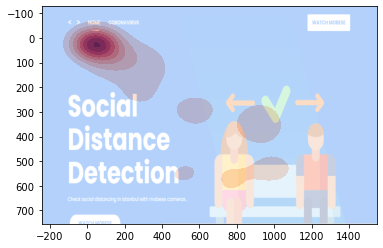

In [12]:
from scipy import ndimage
from PIL import Image
from PIL import ImageOps

im = Image.open("test.png")
im = ImageOps.mirror(im)
h=sns.kdeplot(df, cmap="Reds", shade=True, shade_lowest=False)
rotated_img = ndimage.rotate(im, 180)
# update
h.imshow(rotated_img,
         aspect=h.get_aspect(),
         extent= h.get_xlim() + h.get_ylim(),cmap="Reds", alpha = 0.3,
         zorder=2)

plt.gca().invert_yaxis()
plt.show() # add
